## Reading from a C version FastPM snapshot file.

We will
- create a parameter file, a simple power spectrum in units of Mpc/h,
- run FastPM to obtain a snapshot at z=0
- load the result with nbodykit


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from nbodykit.source.catalog.file import BigFileCatalog
from nbodykit.source.mesh import BigFileMesh

In [4]:
from nbodykit.cosmology import Planck15
from nbodykit.cosmology import EHPower

In [5]:
k = numpy.logspace(-4, 2, 1000)
p = EHPower(Planck15, redshift=0.0)(k)
numpy.savetxt('powerspec.txt', numpy.array((k, p)).T)

In [6]:
%%file nbodykit.lua

nc = 128
boxsize = 384.0

time_step = linspace(0.1, 1, 10)

output_redshifts= {0.0}  -- redshifts of output

omega_m = 0.307494
h       = 0.6774

read_powerspectrum= "powerspec.txt"
random_seed= 100

pm_nc_factor = 2

np_alloc_factor= 4.0      -- Amount of memory allocated for particle

write_snapshot= "fastpm" 
write_nonlineark= "fastpm" 

-- 1d power spectrum (raw), without shotnoise correction
write_powerspectrum = "powerspec-debug"


Overwriting nbodykit.lua


In [7]:
%%bash
export OMP_NUM_THREADS=1
mpirun -n 4 ../src/fastpm nbodykit.lua

[ 0000000.0000 ]: This is FastPM, with libfastpm version 1.0.097fdf5eb9-dirty.
[ 0000000.0015 ]: Configuration {
	boxsize = 384.0,
	compute_potential = false,
	dealiasing_type = "none",
	dh_factor = 1.0,
	enforce_broadband_kmax = 4,
	f_nl_type = "none",
	force_mode = "fastpm",
	h = 0.677400000000000002,
	inverted_ic = false,
	kernel_type = "3_4",
	kmax_primordial_over_knyquist = 0.25,
	nc = 128,
	np_alloc_factor = 4.0,
	omega_m = 0.30749399999999999,
	painter_support = 2,
	painter_type = "cic",
	pm_nc_factor = 2,
	random_seed = 100,
	read_powerspectrum = "powerspec.txt",
	remove_cosmic_variance = false,
	set_mode_method = "override",
	shift = false,
	sigma8 = 0,
	write_nonlineark = "fastpm",
	write_powerspectrum = "powerspec-debug",
	write_snapshot = "fastpm",
	za = false,
	aout = {
		1.0,
	},
	output_redshifts = {
		0.0,
	},
	time_step = {
		0.100000000000000006,
		0.190000000000000002,
		0.280000000000000027,
		0.369999999999999996,
		0.459999999999999964,
		0.550000000000000044,
		0

In [8]:
!ls -l fastpm_1.0000

total 0
drwxrwxr-x. 1 yfeng1 yfeng1 36 Apr  3 14:39 1
drwxrwxr-x. 1 yfeng1 yfeng1 38 Apr  3 14:39 DensityK
drwxrwxr-x. 1 yfeng1 yfeng1 38 Apr  3 14:39 Header


In [7]:
part = BigFileCatalog('fastpm_1.0000', dataset='1/', header='Header')

In [8]:
mesh = BigFileMesh('fastpm_1.0000/', 'DensityK')

In [9]:
field = mesh.to_field(mode='complex')

In [10]:
image = mesh.preview(axes=(0, 1))

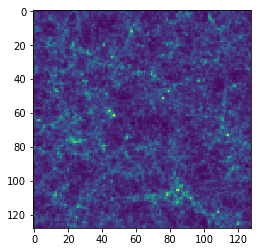

In [11]:
imshow(image)

In [12]:
image = part.to_mesh(Nmesh=128).preview(axes=(0, 1))

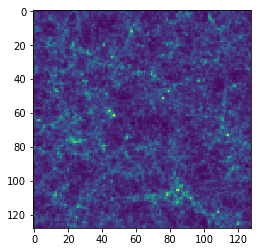

In [13]:
imshow(image)